In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_regression

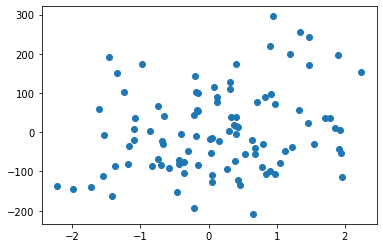

In [2]:
#développement d'un modèle de régression à deux features
np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=2, noise = 20) # creation d'un dataset (x, y) linéaire
plt.scatter(x[:,0], y) # afficher les résultats. x_1 en abscisse et y en ordonnée

In [3]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib

ax = plt.axes(projection='3d')

ax.scatter(x[:,0], x[:,1], y) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

Using matplotlib backend: MacOSX


Text(0.5, 0, 'y')

In [4]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [5]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [6]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

In [7]:
#fonction coût,model,gradient, gradient descent
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def model(X, theta):
    return X.dot(theta)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [8]:
#phase d'entraînement
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[28.13116497],
       [98.39986854],
       [-1.02557637]])

In [9]:
#affichage de la prédiction
#%matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

In [10]:
#learning curve et évaluation finale

plt.plot(range(n_iterations), cost_history)

#coefficient r carré
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
coef_determination(y, predictions)

0.968056688008027